Potential Flow Theory
======
***

In this Python exercise we will visualize the potential flows from the exercises of Mathemical Methods in Fluid Mechanics. The examples for this exercises are inspired by the project "[AeroPython](https://github.com/barbagroup/AeroPython)" of Professor Barba. There you can find further examples on how to use potential theory to mimic different kind of flows.

In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt

# option that matplotlib plots appear in the notebook
%matplotlib inline 

Source and sink flow
----
***

In this part we want to visualize numericall ythe streamlines of the potential flow of a source and a sink.


We first need an evenly spaced Cartesian mesh for our $x-$ and $y-$coordinates. For this we will use the numpy function [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create two 1D arrays. With these 1D arrays we can subsequently create 2D arrays with the function [`meshgrid()`](http://docs.scipy.org/doc/numpy-1.4.x/reference/generated/numpy.meshgrid.html) to obtain arrays, holding the coordinate information of every grid point.

In [31]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

#print('x = ', x) # uncomment to see content of x
#print('y = ', y) # uncomment to see content of y

X, Y = np.meshgrid(x, y)              # generates a mesh grid

The complex potential of the source flow is given by

$$ F(z) = \frac{M}{2\pi} \ln(z), $$
with the source strength $M$. Deriving the complex potential with respect to $z$ and replacing the complex coordinate by its Cartesian representation

$$ \frac{\mathrm{d}F}{\mathrm{d}z} = \frac{M}{2\pi} \frac{1}{z} = \frac{M}{2\pi} \frac{x}{x^2 + y^2} - i \frac{M}{2\pi} \frac{y}{x^2 + y^2}$$

we are now able to identify the velocity components $u$ and $v$:
$$ u = \frac{M}{2\pi} \frac{x}{x^2 + y^2}$$

$$ v = \frac{M}{2\pi} \frac{y}{x^2 + y^2}$$

We now determine the velocity components with the 2D arrays of the coordinates and defining a source strength with the value of 5. In order to move the source position, we define coordinates for the source, which will be used to substract from our coordinates, so we will determine the following expressions for the velocities:

$$ u = \frac{M}{2\pi} \frac{x - x_{source}}{(x-x_{source})^2 + (y-y_{source})^2}$$

$$ v = \frac{M}{2\pi} \frac{y - y_{source}}{(x-x_{source})^2 + (y-y_{source})^2}$$

In [32]:
Msource = 5.0                          # source strength
x_source, y_source = 0.0, 0.0    # location of the source

# compute the velocity field on the mesh grid
u_source = (Msource / (2 * np.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (Msource / (2 * np.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

Now, we can plot the streamlines by using the function [`streamplot()`](http://matplotlib.org/users/whats_new.html#streamplot) from the matplotlib package. To mark the source position, we can use the [`scatter()`](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter) function.

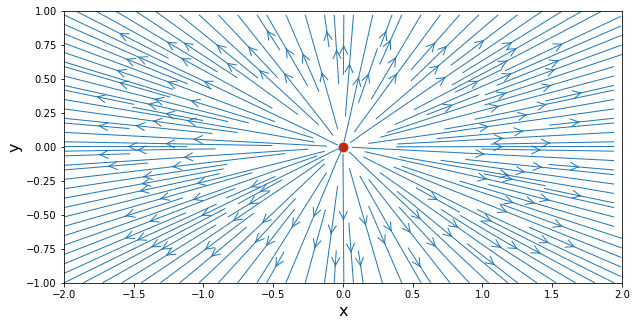

In [33]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o');

You can change position of the source. Also you can modify the sign of the source strength to get the streamlines of a sink flow.

If we use polar coordinates, we can reexpress the complex potential of the source flow:

$$ F(z) = \frac{M}{2\pi} \ln(z) = \frac{M}{2\pi} \left( \ln(r) + i \theta \right) $$

and the potential function is then given by

$$ \Phi = \frac{M}{2\pi} \ln(r).$$

So the potential lines, which have a constant value $\Phi = \Phi_c$, are circles around the origin with constant radius for the source flow:

$$ r_\Phi = \exp\left( \frac{2\pi \Phi_c}{M} \right).$$

With the relation between Cartesian and polar coordinates, the $x-$ anc $y-$coordinates of the potential lines can be expressed as

$$ x_\Phi = r_\Phi \cos(\theta) \quad , \quad y_\Phi = r_\Phi \sin(\theta).$$

All we need now to plot the potential function is to define several constant potential function values (ranging from 0.025 to 0.35) and the azimuthal angle $\theta = 0,\ldots,2\pi$ and then calculating the $x-$ and $y-$position of each potential line.

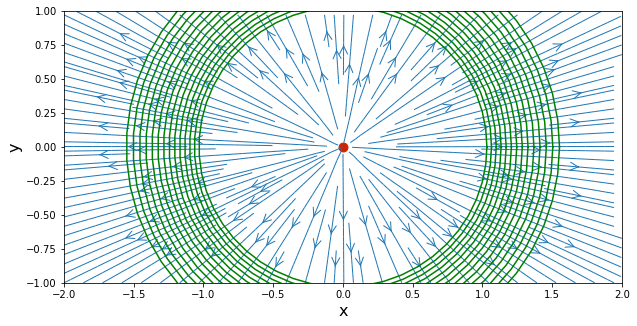

In [34]:
theta = np.linspace(0,2*np.pi)
Phi = np.linspace(0.025, 0.35, 14)

plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
# compute potential lines
for i in range(len(Phi)):
    r = np.exp(Phi[i]*2*np.pi/Msource)
    xpot = r*np.cos(theta)
    ypot = r*np.sin(theta)
    plt.plot(xpot,ypot, 'g-')   # plot current potential line
    
plt.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o');

Irrotational vortex
----
***

The complex potential of an irrotational vortex around the origin is

$$ F(z) =  -i \frac{\Gamma}{2\pi} \ln(z)$$
with the circulation strength $\Gamma$. From exercise 2.1 we know, that the potential and stream function are

$$ \Phi = \frac{\Gamma}{2\pi} \theta \quad \text{and} \quad 
   \Psi = - \frac{\Gamma}{2\pi} \ln(r)$$
   
The velocity components are given by

$$ u = - \frac{\Gamma}{2\pi} \frac{y}{x^2 + y^2}$$

$$ v =   \frac{\Gamma}{2\pi} \frac{x}{x^2 + y^2}$$

Similar to the previous part we are now able to plot calculate the stream and potential lines for the irrotational vortex.

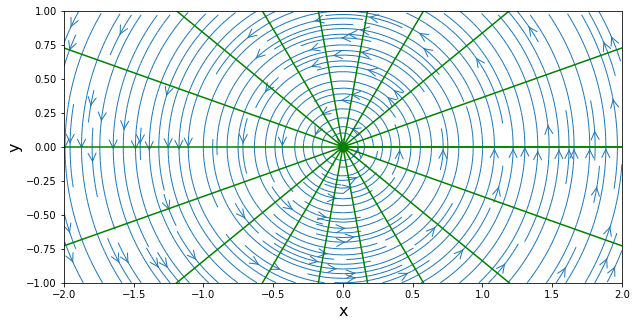

In [35]:
Gamma = 5.0                          # potential vortex strength
x_vortex, y_vortex = 0.0, 0.0    # location of the source

# compute the velocity field on the mesh grid
u_vortex = -Gamma / (2 * np.pi) * Y / (X**2 + Y**2)
v_vortex =  Gamma / (2 * np.pi) * X / (X**2 + Y**2)

# 
theta = np.linspace(0,2*np.pi,19)
radius = np.linspace(0.0, 4.)

plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# compute potential lines
for i in range(len(theta)):
    xpot = radius*np.cos(theta[i])
    ypot = radius*np.sin(theta[i])
    plt.plot(xpot,ypot, 'g-')   # plot current potential line
    
plt.streamplot(X, Y, u_vortex, v_vortex,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_vortex, y_vortex,
               color='#CD2305', s=80, marker='o');

Uniform flow with source
----
***

In this part we consider the superimposition of a uniform flow and a source flow to generate a flow around a body contour. The complex potential of the combined potential flows is

$$ F(z) = U_\infty z + \frac{M}{2\pi}\ln(z) $$

The stream function of this complex potential is 

$$ \Psi = \Psi_{uniform} + \Psi_{source} = U_\infty r \sin(\theta) + \frac{\theta M}{2\pi}$$,
where the first term of the right side is the stream function of the uniform flow and the second term corresponds to the streamfunction of the source flow.
The stream function of the uniform flow expressed in Cartesian coordinates is

$$ \Psi_{uniform} = U_\infty y$$
and the velocity components follow as

$$ u = U_\infty \quad \text{and} \quad v = 0. $$

With this we can now calculate the velocity components and stream function of the uniform flow.

In [36]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # 1D-array for x
y = np.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

The streamfunction of the source flow is:

$$ \Psi_\text{source} = \frac{M}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

With the velocity components of the source flow, given in the previous part, we can compute everything for the source flow. We will define a function `get_velocity()` to compute the velocity components on the Cartesian mesh. The function receives as inputs, the `strength` of the source and the position of the source origin `xs` and `ys`. We define the function with the `def` command, which is followed by the chosen name for the function and inside the paranthesis, we specify the input parameters. 

In [37]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Return the velocity field of a source/sink flow
    
    Parameters:
        - strength:  strength of the source/sink 
        - xs:        x-coordinate of the source
        - ys:        y-coordinate of the source
        - X:         x-coordinate of the mesh points.
        - Y:         y-coordinate of the mesh points.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

The text inside the quotes `"""` describes how the function works. This function definition can be displayed when calling `help()`, like this:

In [38]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Return the velocity field of a source/sink flow
    
    Parameters:
        - strength:  strength of the source/sink 
        - xs:        x-coordinate of the source
        - ys:        y-coordinate of the source
        - X:         x-coordinate of the mesh points.
        - Y:         y-coordinate of the mesh points.



Similar, we define a function to compute the stream function of the source flow:

In [39]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters:
        - strength:   Strength of the source/sink.
        - xs:         x-coordinate of the source (or sink).
        - ys:         y-coordinate of the source (or sink).
        - X:          x-coordinate of the mesh points.
        - Y:         y-coordinate of the mesh points.
    
    Returns:
        - psi:        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

Now we can compute the velocity components and stream function of the combined flows. Furthermore, we will display the stagnation points, which can be determined by

$$ x_{stagnation point} = - \frac{M}{2\pi U_\infty} \quad \text{and} \quad
   y_{stagnation point} = 0$$

In [40]:
Msource = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

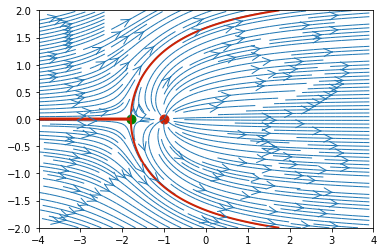

In [45]:
##########################################################
### TODO: your code here #################################
##########################################################

# build the velociy field (both components) by superposing (summing) a parallel flow and a sink
# the center of the source is at (x_source,y_source) = (-1,0) ---> defined above!
# you should use the following variables/functions (already defined):
# the functions get_velocity and get_stream_function (check their comment lines to see what they do),
# u_freestream, v_freestream, psi_freestream

# then: plot the streamlines (copy code from above, adapt it if necessary)
# also: plot the streamlines associated to psi = -Msource/2, Msource/2


##########################################################
### END OF YOUR CODE #####################################
##########################################################

plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - Msource / (2 * np.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
plt.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

We can now easily add a sink on the other side at $(x_{sink},y_{sink}) = (1,0)$ to the existing complex potential.

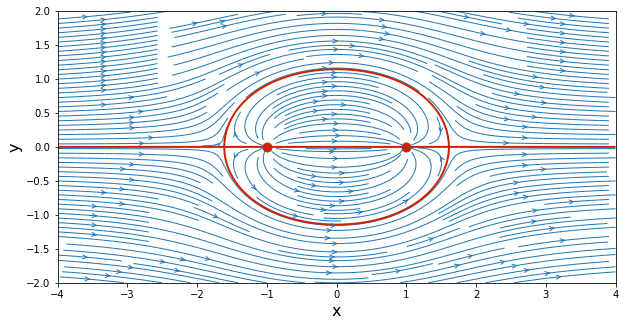

In [46]:
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(-Msource, -x_source, y_source, X, Y)

# compute the stream-function on the grid mesh
psi_sink = get_stream_function(-Msource, -x_source, y_source, X, Y)

# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter([x_source, -x_source], [y_source, y_source],
               color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

From the lecture and exercise we know that with Bernoulli's equation we are able to plot the pressure field. 
The stationary Bernoulli equation without any gravitational influence is

$$ p + \frac{1}{2} \rho_\infty || w(x,y) ||^2 = p_\infty +  \frac{1}{2} \rho_\infty U_\infty, $$
where $w(x,y)$ is the complex velocity. 

By rearranging the terms to the pressure coefficient $C_p$, we get:

$$ c_p = \frac{p-p_\infty}{\frac{1}{2}\rho_\infty U_\infty} = 1 - \left( \frac{|| w(x,y) ||^2}{U_\infty^2} \right).$$

Since we have already the velocity field, it is easy to compute the pressure coeffient:

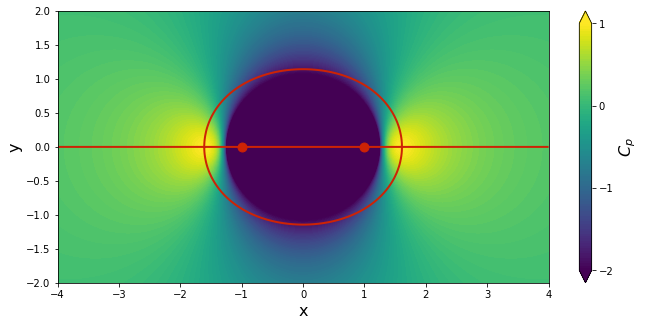

In [47]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter([x_source, -x_source], [y_source, y_source],
               color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

Cylinder with uniform flow
----
***

The potential flow around a cylinder is described by doublet potential superimposed with a uniform flow. The complex potential for this scenario is:

$$ F(z) = U_\infty z + \frac{M}{2\pi} \frac{1}{z} .$$

First let us determine the velocity components out of the complex potential of the doublet flow.

$$ \frac{\mathrm{d}F_{doublet}}{\mathrm{d}z} 
    = \underbrace{\frac{-M}{2\pi} \frac{x^2 - y^2}{(x^2 + y^2)^2}}_{=u} 
     - i 
     \underbrace{\left( \frac{-M}{2\pi} \frac{2xy}{(x^2 + y^2)^2}  \right)}_{= v} $$
     
With this we can now compute the velocity components and streamfunction of the doublet and visualize it.

In [48]:
def get_velocity_doublet(strength, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters:
        - strength:    Strength of the doublet.
        - X:           x-coordinate of the mesh points.
        - Y:           y-coordinate of the mesh points.
    
    Returns:
        - u:           x-component of the velocity vector field.
        - v:           y-component of the velocity vector field.
    """
    u = - strength / (2 * np.pi) * (X**2 - Y**2) / ((X**2 + Y**2)**2)
    v = - strength / (2 * np.pi) * 2*X*Y /((X**2 + Y**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters:
        - strength:    Strength of the doublet.
        - X:           x-coordinate of the mesh points.
        - Y:           y-coordinate of the mesh points.
    
    Returns:
        - psi:         The stream-function.
    """
    psi = - strength / (2*np.pi) * Y / (( X**2 + Y**2))
    
    return psi

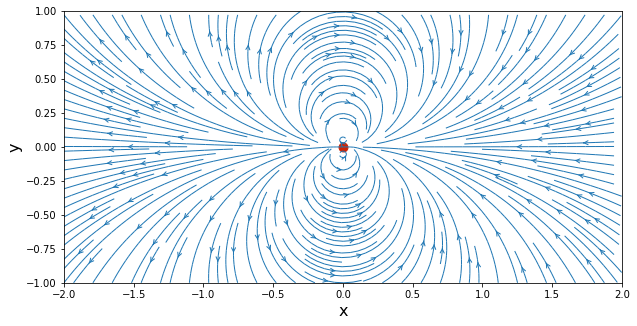

In [49]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

Mdoublet = 1.0                        # strength of the doublet


# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(Mdoublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(Mdoublet, X, Y)

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(0.0, 0.0, color='#CD2305', s=80, marker='o');

Now we superimpose the uniform flow on top of the doublet flow, which will give us the flow around a cylinder!

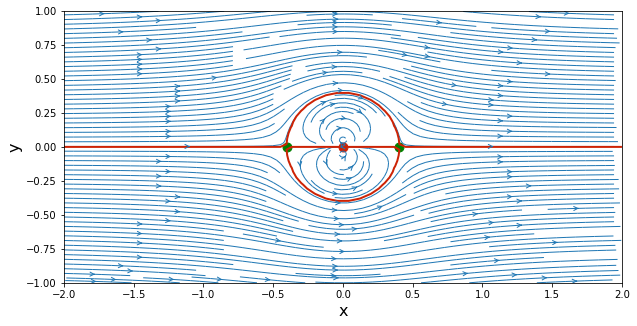

In [50]:
u_inf = 1.0        # freestream speed

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(0.0, 0.0, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +np.sqrt(Mdoublet / (2 * np.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -np.sqrt(Mdoublet / (2 * np.pi * u_inf)), 0.0

# display the stagnation points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

Rotating cylinder
----
***

The rotating cylinder is a result of the superimposition of the uniform flow and doublet flow with the irrotational vortex flow. The complex potential is given from the exercise 3.3:

$$ F(z) = U_\infty z + \frac{M}{2\pi}\frac{1}{z} - i \frac{\Gamma}{2\pi} \ln(z) .$$

So we can use the functions from the previous part for the uniform flow and the doublet flow. For the irrotational vortex we already calculated the velocity components and streamfunction at the beginning of this document. Those calculations will be first put into some functions. 

In [51]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters:
        - strength:     Strength of the vortex.
        - xv:           x-coordinate of the vortex.
        - yv:           y-coordinate of the vortex.
        - X:            x-coordinate of the mesh points.
        - Y:            y-coordinate of the mesh points.
    
    Returns:
        - u:         x-component of the velocity vector field.
        - v:         y-component of the velocity vector field.
    """
    u = +strength / (2 * np.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * np.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters:
        - strength:     Strength of the vortex.
        - xv:           x-coordinate of the vortex.
        - yv:           y-coordinate of the vortex.
        - X:            x-coordinate of the mesh points.
        - Y:            y-coordinate of the mesh points.
    
    Returns:
        - psi:         The stream-function.
    """
    psi = strength / (4 * np.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [66]:
gamma = 2                     # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

Mdoublet = 1.0                   # strength of the doublet


# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

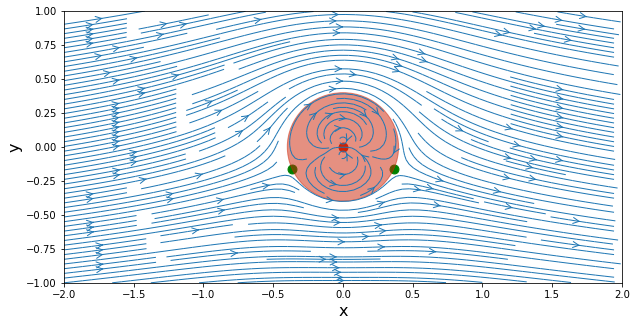

In [67]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

# calculate the cylinder radius
R = np.sqrt(Mdoublet / (2 * np.pi * u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (+np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))
x_stagn2, y_stagn2 = (-np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = plt.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

Cool, we get our flow around a rotating cylinder! You see how the stagnation points move downwards if you further increase the circulation of the irrotatinoal vortex. What happens if you set a value of $\Gamma > 4\pi U_\infty R$ ?